In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [10]:
def create_random_dataset(function):
    rng = np.random.RandomState(1)
    X = np.sort(5 * rng.rand(80, 1), axis=0)
    
    if function == 'sin':
        y = np.sin(X).ravel()
    if function == 'piecewise':
        y = np.piecewise(X.flatten(), [X.flatten() < 3, X.flatten() >= 3], [-1, 1]).ravel()
    
    y[::2] += 1 * (0.5 - rng.rand(40))
    
    X_test = np.arange(0.0, 5.0, 0.01)[:, np.newaxis]
    return X, y, X_test

X, y, X_test = create_random_dataset('piecewise')

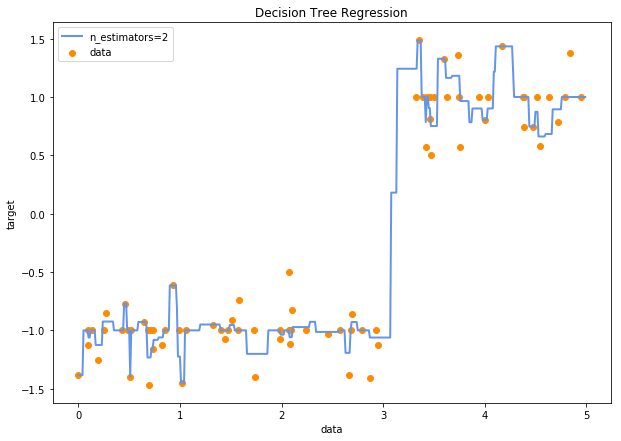

In [11]:
from sklearn.ensemble import RandomForestRegressor

def fit_predict_plot(n_estimators):
    clf = RandomForestRegressor(n_estimators=n_estimators)
    clf.fit(X, y)
    y_pred = clf.predict(X_test)

    plt.figure(figsize=(10, 7))
    plt.scatter(X, y, c="darkorange", label="data")
    plt.plot(X_test, y_pred, color="cornflowerblue", 
             label='n_estimators=' + str(n_estimators), linewidth=2)
    plt.xlabel("data")
    plt.ylabel("target")
    plt.title("Decision Tree Regression")
    plt.legend()
    plt.show()
    
    
fit_predict_plot(n_estimators=2)

## 1-й хак: Bootstrap aggregating aka Bagging

Размер новой выборки такой же как размер старой. Количество уникальных элементов в новой выборке - (1 - 1/e) (≈63.2%) 

Обоснование из статистики: https://youtu.be/5Lu1eTiX7qM

Если коротко: бутстреп генерирует iid (<a href="https://ru.wikipedia.org/wiki/Независимые_одинаково_распределённые_случайные_величины">independent and identically-distributed</a>) выборки, а значит, к ним можно применять ц.п.т.

<b>Параметр</b>: bootstrap=True

<img src='../imgs/the-bootstrap-and-beyond-using-jsl-for-resampling-38-638.jpg' width=500>

## 2-й хак: Dimention reduction
На каждом сплите ноды дерева, мы выбираем лучший сплит не из всех координат, а из части

<b>N/3</b> - для регрессии<br>
<b>sqrt(N)</b> - для классификации

<b>Параметр</b>: max_features

<img src="../imgs/rf_dimention_reduction.png">

## Выводы:
- Random Forest борется с изъянами Decision Tree путем построения большого количества разных деревьев и их коллективного голосования.
- Random Forest – не интерпретируемый алгоритм
- Качество Random Forest неубывает с увеличением деревьев (не происходит переобучения)
- Функция predict_proba() для Random Forest имеет больший смысл, чем для Decision Tree